<a href="https://colab.research.google.com/github/Ali-Ahmadi/Digital-Image-Processing/blob/master/03_histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Enhancement - Image Histogram 
![histogram of an image](https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/_images/histeq.png)

In this section you will see how to calculate and plot the histogram and cumulative histogram of an image using OpenCV in python. 

You can find more information in OpenCV documentation.
[here](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)

Import required packages necessary for image processing.

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
img = cv2.imread('airplane_grayscale.jpg')

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

**images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

**channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

**mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

**histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

**ranges** : this is our RANGE. Normally, it is [0,256].

Text(0, 0.5, 'Frequency')

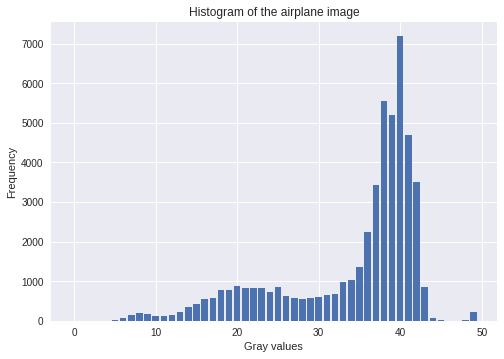

In [0]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

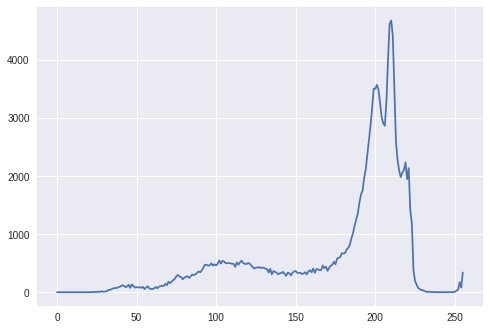

In [0]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

Let's look at another example.

In [0]:
# let's read images
high = cv2.imread('hist_highkey.jpg')
low = cv2.imread('hist_lowkey.jpg')

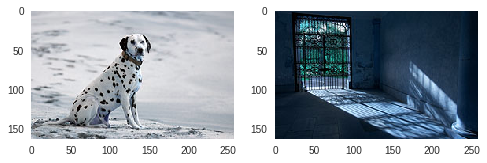

In [0]:
# show images
plt.subplot(121)
plt.imshow(high)
plt.grid(False)

plt.subplot(122)
plt.imshow(low)
plt.grid(False)

plt.show()

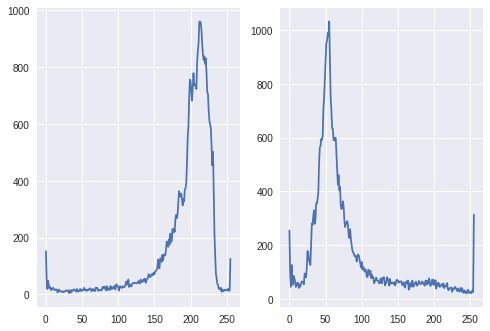

In [0]:
# calculate histogram of both images.
# channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

**Calculate cumulative distribution function (CDF) of an image**
The cumulative histogram of an image is produced by calculating the cumulative sum of that image's histogram. There is no specific function in OpenCV to obtain the CDF of an image; thus we use the cumsum function in Numpy. You can find more about the function [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)


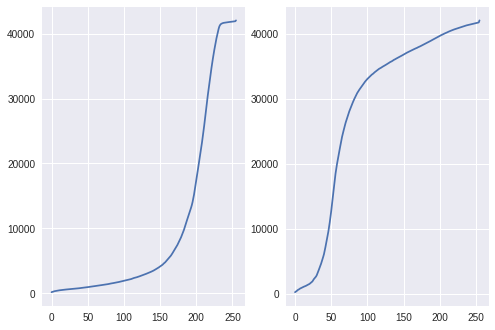

In [0]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(121)
plt.plot(cdf_high)

plt.subplot(122)
plt.plot(cdf_low)

plt.show()